**NOTEBOOK FOR IN DEPTH ANALYSIS OF RUNNING DATA**

Author : Andrea Valente

Date: May, 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns

same general stats as in java project +
* histogram of pace
* ml model to predict performance (you will have to find an indicator of good performance)

# Helper functions

In [2]:
def list_element_to_int(my_list:list):
    """
    returns elements of a list as integers
    """
    try:
        res = [int(x) for x in my_list]
        if len(res) > 2:
            return res[0] * 3600 + res[1] * 60 + res[2]
        else:
            return res[0] * 60 + res[1]
    except Exception as e:
        return np.nan

In [3]:
def hms_to_secs(time: pd.Series):
    """
    Converts time in the h:m:s format to seconds using the list_element_to_int fun
    """
    temp = time.apply(lambda x: x.split('.')[0]) # remove decimals (all after .)  
    temp2 = temp.str.split(':')
    return temp2.apply(lambda x: list_element_to_int(x))

How to write a function that takes a string and can be applied to pandas Series (df column)

# load data

In [8]:
rundata = pd.read_csv('D:/PycharmProjectsDD/NewRunAnalyzer/data/Activities.csv')
print('Shape of running dataset: ' + str(rundata.shape))

Shape of running dataset: (338, 41)


In [9]:
rundata.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Avg Run Cadence.1,Max Run Cadence.1,Training Stress Score®,Avg Power,Max Power,Grit,Flow,Avg. Swolf,Avg Stroke Rate,Total Reps,Dive Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2022-06-11 15:06:15,False,Reading - Easy Run,5.77,422,00:40:01,160,184,4.0,156,163,6:56,5:40,2,8,0.92,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,02:26.11.9,7,0.0,00:39:54,00:40:44,35,49
1,Running,2022-06-08 18:53:49,False,Reading - Stride Repeats,4.01,265,00:27:38,139,170,3.2,151,196,6:54,4:19,11,15,0.96,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,00:13.68.2,21,0.0,00:27:24,00:28:05,37,48
2,Running,2022-06-06 18:16:58,False,Reading - Easy Run,5.78,423,00:40:00,161,184,4.0,156,163,6:55,6:27,8,15,0.93,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,03:12.57,7,0.0,00:39:47,00:40:11,33,58
3,Running,2022-06-04 16:52:57,False,Benchmark Run,1.43,83,00:09:05.4,140,155,2.0,162,188,6:20,5:06,--,--,0.96,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,00:05.36.7,4,0.0,00:09:00,00:09:07.0,--,--
4,Running,2022-06-02 18:06:53,False,Reading Running,5.23,380,00:38:03,152,176,3.5,155,161,7:16,6:40,--,--,0.89,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,01:38.44.5,6,0.0,00:37:55,00:38:44,37,40


# prepare and analyze

## Set columns

In [10]:
cols = ['Date','Title', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Avg Run Cadence',
       'Max Run Cadence', 'Avg Pace', 'Best Pace', 'Total Ascent',
       'Total Descent', 'Avg Stride Length',
       'Best Lap Time', 'Moving Time',
       'Elapsed Time', 'Min Elevation', 'Max Elevation'] #'Aerobic TE',

In [11]:
rundata = rundata[cols]

In [12]:
rundata.head()

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,2022-06-11 15:06:15,Reading - Easy Run,5.77,422,00:40:01,160,184,156,163,6:56,5:40,2,8,0.92,02:26.11.9,00:39:54,00:40:44,35,49
1,2022-06-08 18:53:49,Reading - Stride Repeats,4.01,265,00:27:38,139,170,151,196,6:54,4:19,11,15,0.96,00:13.68.2,00:27:24,00:28:05,37,48
2,2022-06-06 18:16:58,Reading - Easy Run,5.78,423,00:40:00,161,184,156,163,6:55,6:27,8,15,0.93,03:12.57,00:39:47,00:40:11,33,58
3,2022-06-04 16:52:57,Benchmark Run,1.43,83,00:09:05.4,140,155,162,188,6:20,5:06,--,--,0.96,00:05.36.7,00:09:00,00:09:07.0,--,--
4,2022-06-02 18:06:53,Reading Running,5.23,380,00:38:03,152,176,155,161,7:16,6:40,--,--,0.89,01:38.44.5,00:37:55,00:38:44,37,40


In [13]:
#rundata.Title.value_counts()

## Data types

In [13]:
rundata.dtypes

Date                  object
Title                 object
Distance             float64
Calories              object
Time                  object
Avg HR                 int64
Max HR                 int64
Avg Run Cadence        int64
Max Run Cadence        int64
Avg Pace              object
Best Pace             object
Total Ascent          object
Total Descent         object
Avg Stride Length    float64
Best Lap Time         object
Moving Time           object
Elapsed Time          object
Min Elevation         object
Max Elevation         object
dtype: object

In [15]:
rundata['Short_date'] = rundata['Date'].str[0:10]

In [16]:
rundata['Date'] = pd.to_datetime(rundata['Date'], infer_datetime_format=True)

In [17]:
rundata.sort_values(by=['Date'],inplace=True)

In [18]:
rundata['Calories'] = rundata['Calories'].replace(',','',regex=True).astype(int)

## New columns

In [19]:
rundata['Distance_in_miles'] = (rundata['Distance'] / 1.609344)

In [20]:
rundata['Time_in_secs'] = hms_to_secs(rundata['Time'])

In [21]:
rundata['Avg_pace_secs'] = hms_to_secs(rundata['Avg Pace'])  

In [22]:
rundata['Best_pace_secs'] = hms_to_secs(rundata['Best Pace'])  

In [23]:
rundata['Hour_of_day'] = rundata['Date'].dt.hour

In [24]:
rundata['Month'] = rundata['Date'].dt.month.astype(str)

In [25]:
rundata['Month_Year'] = rundata['Date'].dt.to_period('M')

In [26]:
rundata['Short_date'] = pd.to_datetime(rundata['Short_date'])

In [27]:
# moving average pace
rundata['Pace_MA_7'] = rundata['Avg_pace_secs'].rolling(7).mean()
rundata['Pace_MA_30'] = rundata['Avg_pace_secs'].rolling(30).mean()

In [28]:
# moving average distance
rundata['Distance_MA_30'] = rundata['Distance'].rolling(30).mean()
rundata['Distance_MA_60'] = rundata['Distance'].rolling(60).mean()

In [29]:
# heart rate moving average
rundata['Avg_HR_MA_30'] = rundata['Avg HR'].rolling(30).mean()
rundata['Avg_HR_MA_60'] = rundata['Avg HR'].rolling(60).mean()

In [30]:
rundata.head()

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Short_date,Distance_in_miles,Time_in_secs,Avg_pace_secs,Best_pace_secs,Hour_of_day,Month,Month_Year,Pace_MA_7,Pace_MA_30,Distance_MA_30,Distance_MA_60,Avg_HR_MA_30,Avg_HR_MA_60
337,2020-10-11 13:19:38,Appiano Gentile Corsa,0.85,61,00:05:00.0,150,173,160,164,5:55,4:24,--,17,1.06,05:00.02.3,00:04:59,00:05:00.0,339,357,2020-10-11,0.528166,300,355,264,13,10,2020-10,NaN,NaN,NaN,NaN,NaN,NaN
336,2020-10-11 13:27:38,Appiano Gentile Corsa,0.79,62,00:05:00.4,153,167,158,160,6:19,5:35,5,7,1.00,05:00.37.7,00:04:59,00:05:00.4,339,346,2020-10-11,0.490883,300,379,335,13,10,2020-10,NaN,NaN,NaN,NaN,NaN,NaN
335,2020-10-11 13:35:38,Appiano Gentile Corsa,0.74,70,00:05:00.6,169,180,156,160,6:47,6:10,--,2,0.94,05:00.57.1,00:04:59,00:05:00.6,338,341,2020-10-11,0.459815,300,407,370,13,10,2020-10,NaN,NaN,NaN,NaN,NaN,NaN
334,2020-10-12 18:45:11,Appiano Gentile Corsa,1.20,104,00:08:00.9,160,179,156,160,6:40,4:28,7,18,0.96,01:21.13.3,00:07:58.7,00:08:00.9,339,356,2020-10-12,0.745645,480,400,268,18,10,2020-10,NaN,NaN,NaN,NaN,NaN,NaN
333,2020-10-12 18:58:32,Appiano Gentile Corsa,1.13,113,00:08:00.9,171,187,152,156,7:05,5:23,7,8,0.93,00:54.06.9,00:07:58.9,00:08:00.9,338,347,2020-10-12,0.702149,480,425,323,18,10,2020-10,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
rundata.sort_values(by =['Date'],inplace=True)

In [32]:
rundata.reset_index(drop=True,inplace=True)

In [33]:
rundata.head(10)

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Short_date,Distance_in_miles,Time_in_secs,Avg_pace_secs,Best_pace_secs,Hour_of_day,Month,Month_Year,Pace_MA_7,Pace_MA_30,Distance_MA_30,Distance_MA_60,Avg_HR_MA_30,Avg_HR_MA_60
0,2020-10-11 13:19:38,Appiano Gentile Corsa,0.85,61,00:05:00.0,150,173,160,164,5:55,4:24,--,17,1.06,05:00.02.3,00:04:59,00:05:00.0,339,357,2020-10-11,0.528166,300,355,264,13,10,2020-10,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-11 13:27:38,Appiano Gentile Corsa,0.79,62,00:05:00.4,153,167,158,160,6:19,5:35,5,7,1.00,05:00.37.7,00:04:59,00:05:00.4,339,346,2020-10-11,0.490883,300,379,335,13,10,2020-10,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-11 13:35:38,Appiano Gentile Corsa,0.74,70,00:05:00.6,169,180,156,160,6:47,6:10,--,2,0.94,05:00.57.1,00:04:59,00:05:00.6,338,341,2020-10-11,0.459815,300,407,370,13,10,2020-10,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-12 18:45:11,Appiano Gentile Corsa,1.20,104,00:08:00.9,160,179,156,160,6:40,4:28,7,18,0.96,01:21.13.3,00:07:58.7,00:08:00.9,339,356,2020-10-12,0.745645,480,400,268,18,10,2020-10,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-12 18:58:32,Appiano Gentile Corsa,1.13,113,00:08:00.9,171,187,152,156,7:05,5:23,7,8,0.93,00:54.06.9,00:07:58.9,00:08:00.9,338,347,2020-10-12,0.702149,480,425,323,18,10,2020-10,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-10-13 18:31:07,Appiano Gentile Corsa,0.49,27,00:02:33.3,137,157,166,170,5:12,3:22,--,9,1.16,02:33.27.2,00:02:33,00:02:33.3,339,349,2020-10-13,0.304472,153,312,202,18,10,2020-10,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-10-14 18:17:01,Appiano Gentile Corsa,2.95,226,00:20:02,141,156,156,160,6:47,3:28,16,33,0.94,06:29.12.8,00:20:00,00:20:02,338,357,2020-10-14,1.833045,1202,407,208,18,10,2020-10,383.571429,NaN,NaN,NaN,NaN,NaN
7,2020-10-17 17:03:31,Reading Corsa,0.81,59,00:05:00.5,149,162,156,160,6:09,4:28,2,4,1.04,05:00.46.3,00:05:00,00:05:00.5,39,42,2020-10-17,0.503311,300,369,268,17,10,2020-10,385.571429,NaN,NaN,NaN,NaN,NaN
8,2020-10-17 17:11:33,Reading Corsa,1.20,108,00:08:00.9,168,187,152,156,6:41,5:06,--,--,0.99,01:25.37.8,00:07:58.5,00:08:00.9,39,42,2020-10-17,0.745645,480,401,306,17,10,2020-10,388.714286,NaN,NaN,NaN,NaN,NaN
9,2020-10-17 17:22:33,Reading Corsa,0.43,39,00:03:00.8,167,174,154,156,7:00,3:48,3,--,0.93,03:00.83.5,00:03:00,00:03:00.8,40,43,2020-10-17,0.267190,180,420,228,17,10,2020-10,390.571429,NaN,NaN,NaN,NaN,NaN


In [34]:
desc_cols = ['Distance','Avg HR','Max HR','Avg Run Cadence','Max Run Cadence','Avg Stride Length',
            'Time_in_secs','Avg_pace_secs','Hour_of_day','Calories','Best_pace_secs']

In [35]:
rundata[desc_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Distance,338.0,4.773136,2.844567,0.3,3.00,4.83,6.44,17.85
Avg HR,338.0,156.369822,10.678297,114.0,151.00,157.50,164.00,178.00
Max HR,338.0,176.727811,11.633748,131.0,170.25,179.00,185.00,205.00
Avg Run Cadence,338.0,155.562130,4.018944,133.0,154.00,156.00,158.00,168.00
Max Run Cadence,338.0,166.582840,9.080612,152.0,162.00,164.00,169.00,240.00
Avg Stride Length,338.0,0.928521,0.054725,0.8,0.90,0.92,0.95,1.18
Time_in_secs,338.0,2031.976331,1299.007749,125.0,1219.75,1908.00,2632.25,8462.00
Avg_pace_secs,338.0,417.029586,26.748843,307.0,405.00,419.00,432.00,516.00
Hour_of_day,338.0,16.393491,2.675677,6.0,16.00,17.00,18.00,22.00
Calories,338.0,363.997041,223.292618,21.0,225.25,341.00,468.75,1340.00


In [36]:
rundata.head(10)

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Short_date,Distance_in_miles,Time_in_secs,Avg_pace_secs,Best_pace_secs,Hour_of_day,Month,Month_Year,Pace_MA_7,Pace_MA_30,Distance_MA_30,Distance_MA_60,Avg_HR_MA_30,Avg_HR_MA_60
0,2020-10-11 13:19:38,Appiano Gentile Corsa,0.85,61,00:05:00.0,150,173,160,164,5:55,4:24,--,17,1.06,05:00.02.3,00:04:59,00:05:00.0,339,357,2020-10-11,0.528166,300,355,264,13,10,2020-10,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-11 13:27:38,Appiano Gentile Corsa,0.79,62,00:05:00.4,153,167,158,160,6:19,5:35,5,7,1.00,05:00.37.7,00:04:59,00:05:00.4,339,346,2020-10-11,0.490883,300,379,335,13,10,2020-10,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-11 13:35:38,Appiano Gentile Corsa,0.74,70,00:05:00.6,169,180,156,160,6:47,6:10,--,2,0.94,05:00.57.1,00:04:59,00:05:00.6,338,341,2020-10-11,0.459815,300,407,370,13,10,2020-10,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-12 18:45:11,Appiano Gentile Corsa,1.20,104,00:08:00.9,160,179,156,160,6:40,4:28,7,18,0.96,01:21.13.3,00:07:58.7,00:08:00.9,339,356,2020-10-12,0.745645,480,400,268,18,10,2020-10,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-12 18:58:32,Appiano Gentile Corsa,1.13,113,00:08:00.9,171,187,152,156,7:05,5:23,7,8,0.93,00:54.06.9,00:07:58.9,00:08:00.9,338,347,2020-10-12,0.702149,480,425,323,18,10,2020-10,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-10-13 18:31:07,Appiano Gentile Corsa,0.49,27,00:02:33.3,137,157,166,170,5:12,3:22,--,9,1.16,02:33.27.2,00:02:33,00:02:33.3,339,349,2020-10-13,0.304472,153,312,202,18,10,2020-10,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-10-14 18:17:01,Appiano Gentile Corsa,2.95,226,00:20:02,141,156,156,160,6:47,3:28,16,33,0.94,06:29.12.8,00:20:00,00:20:02,338,357,2020-10-14,1.833045,1202,407,208,18,10,2020-10,383.571429,NaN,NaN,NaN,NaN,NaN
7,2020-10-17 17:03:31,Reading Corsa,0.81,59,00:05:00.5,149,162,156,160,6:09,4:28,2,4,1.04,05:00.46.3,00:05:00,00:05:00.5,39,42,2020-10-17,0.503311,300,369,268,17,10,2020-10,385.571429,NaN,NaN,NaN,NaN,NaN
8,2020-10-17 17:11:33,Reading Corsa,1.20,108,00:08:00.9,168,187,152,156,6:41,5:06,--,--,0.99,01:25.37.8,00:07:58.5,00:08:00.9,39,42,2020-10-17,0.745645,480,401,306,17,10,2020-10,388.714286,NaN,NaN,NaN,NaN,NaN
9,2020-10-17 17:22:33,Reading Corsa,0.43,39,00:03:00.8,167,174,154,156,7:00,3:48,3,--,0.93,03:00.83.5,00:03:00,00:03:00.8,40,43,2020-10-17,0.267190,180,420,228,17,10,2020-10,390.571429,NaN,NaN,NaN,NaN,NaN


# Plots

## Average pace wit moving averages

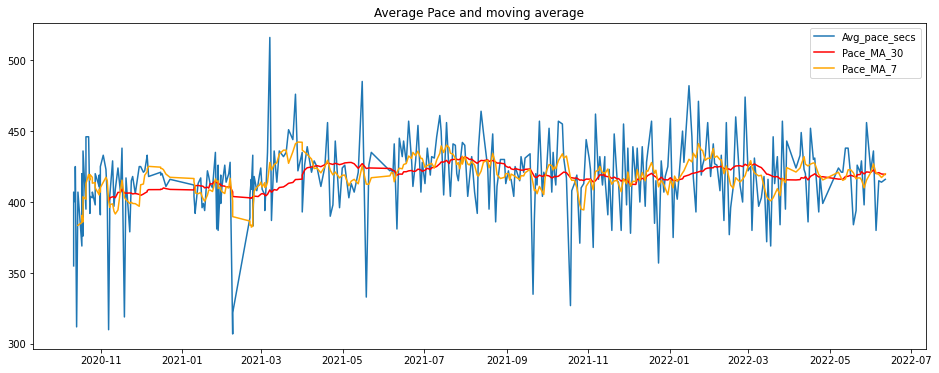

In [41]:
plt.figure(figsize=(16,6))
plt.title("Average Pace and moving average")
plt.plot(rundata['Date'],rundata['Avg_pace_secs'],label='avg pace')
plt.plot(rundata['Date'],rundata['Pace_MA_30'],label='mov avg 30', color='red') #linestyle="-."
plt.plot(rundata['Date'],rundata['Pace_MA_7'],label='mov avg 7',color='orange')
plt.legend(['Avg_pace_secs','Pace_MA_30','Pace_MA_7'])
plt.show()

## Distance with moving average

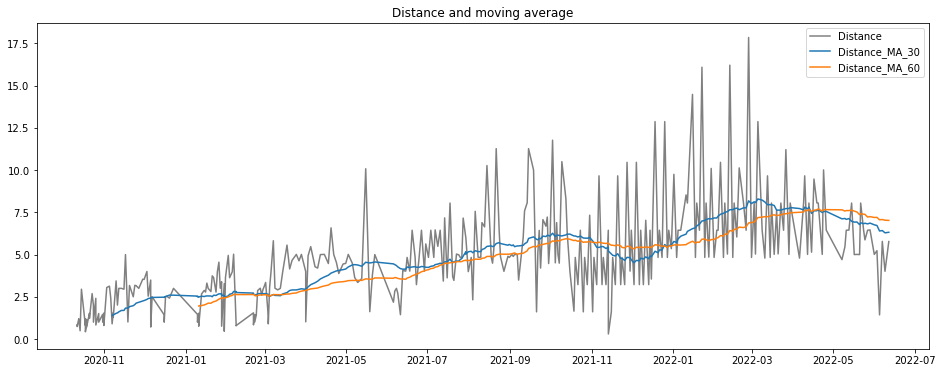

In [42]:
plt.figure(figsize=(16,6))
plt.title("Distance and moving average")
plt.plot(rundata['Date'],rundata['Distance'],label='distance',color='grey')
plt.plot(rundata['Date'],rundata['Distance_MA_30'],label = 'MA 30 days')
plt.plot(rundata['Date'],rundata['Distance_MA_60'],label = 'MA 60 days')
plt.legend(['Distance','Distance_MA_30','Distance_MA_60'])
plt.show()

## HR with moving average

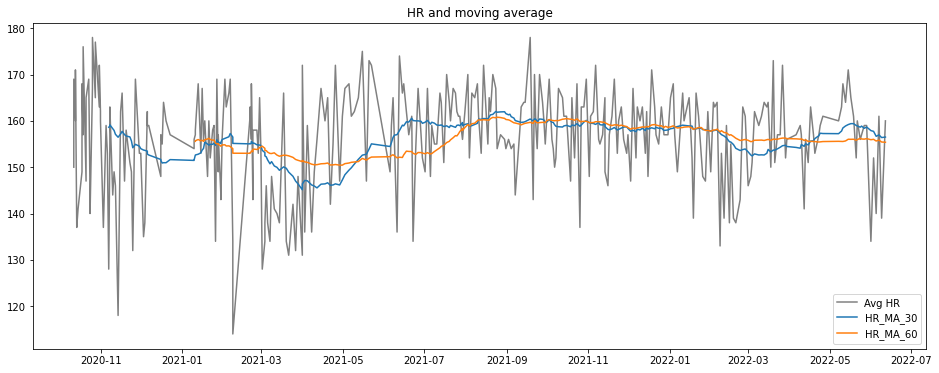

In [43]:
plt.figure(figsize=(16,6))
plt.title("HR and moving average")
plt.plot(rundata['Date'],rundata['Avg HR'],label='distance',color='grey')
plt.plot(rundata['Date'],rundata['Avg_HR_MA_30'],label = 'HR 30 days')
plt.plot(rundata['Date'],rundata['Avg_HR_MA_60'],label = 'HR 60 days')
plt.legend(['Avg HR','HR_MA_30','HR_MA_60'])
plt.show()

## Histogram of average pace

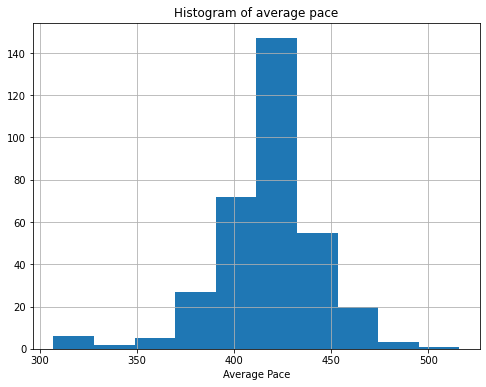

In [44]:
plt.figure(figsize=(8,6))
plt.title('Histogram of average pace')
plt.xlabel('Average Pace')
plt.hist(rundata['Avg_pace_secs'])
plt.grid()
plt.show()

## Histogram of HR

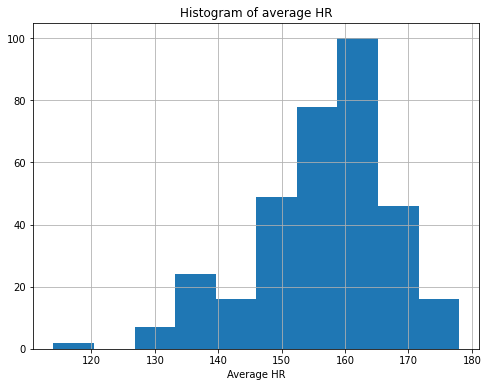

In [45]:
plt.figure(figsize=(8,6))
plt.title('Histogram of average HR')
plt.xlabel('Average HR')
plt.hist(rundata['Avg HR'])
plt.grid()
plt.show()

In [46]:
rundata[desc_cols].corr()

,Distance,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Stride Length,Time_in_secs,Avg_pace_secs,Hour_of_day,Calories,Best_pace_secs
Distance,1.000000,0.265519,0.286611,-0.126004,0.060453,-0.550956,0.995965,0.547472,-0.136021,0.988088,0.411419
Avg HR,0.265519,1.000000,0.846196,0.045824,-0.206071,-0.351922,0.267221,0.272334,-0.143861,0.346536,0.257532
Max HR,0.286611,0.846196,1.000000,-0.005476,-0.125428,-0.310999,0.278738,0.253109,-0.081009,0.354098,0.264442
Avg Run Cadence,-0.126004,0.045824,-0.005476,1.000000,-0.002581,0.165424,-0.159045,-0.526402,-0.098172,-0.115882,-0.028526
Max Run Cadence,0.060453,-0.206071,-0.125428,-0.002581,1.000000,0.215274,0.034981,-0.188866,0.079810,0.028260,-0.242994
Avg Stride Length,-0.550956,-0.351922,-0.310999,0.165424,0.215274,1.000000,-0.584098,-0.915071,0.232781,-0.598182,-0.407073
Time_in_secs,0.995965,0.267221,0.278738,-0.159045,0.034981,-0.584098,1.000000,0.593762,-0.158474,0.990010,0.418043
Avg_pace_secs,0.547472,0.272334,0.253109,-0.526402,-0.188866,-0.915071,0.593762,1.000000,-0.191709,0.587489,0.373887
Hour_of_day,-0.136021,-0.143861,-0.081009,-0.098172,0.079810,0.232781,-0.158474,-0.191709,1.000000,-0.156482,-0.107066
Calories,0.988088,0.346536,0.354098,-0.115882,0.028260,-0.598182,0.990010,0.587489,-0.156482,1.000000,0.422882


[Text(0.5, 1.0, 'Avg Pace vs Distance')]

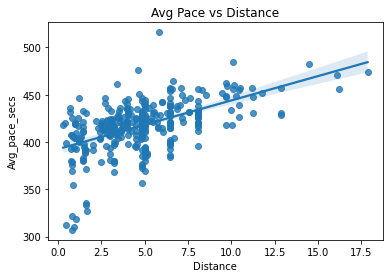

In [47]:
sns.regplot(x='Distance',y='Avg_pace_secs',data=rundata, fit_reg=True).set(title='Avg Pace vs Distance')

## Histogram of Avg Run Cadence

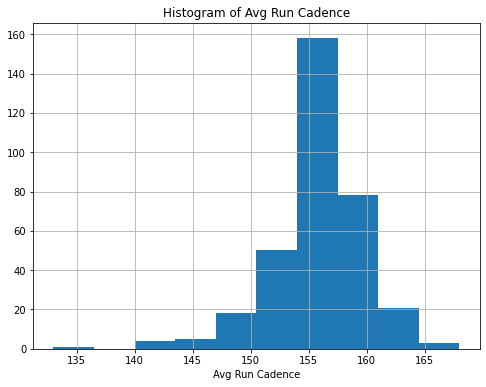

In [48]:
plt.figure(figsize=(8,6))
plt.title('Histogram of Avg Run Cadence')
plt.xlabel('Avg Run Cadence')
plt.grid()
plt.hist(rundata['Avg Run Cadence'])
plt.show()

## Histogram of Distance

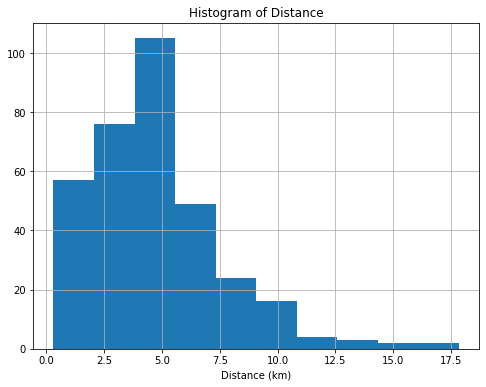

In [49]:
plt.figure(figsize=(8,6))
plt.title('Histogram of Distance')
plt.xlabel('Distance (km)')
plt.grid()
plt.hist(rundata['Distance'])
plt.show()

In [50]:
rundata['Distance'].value_counts().head(10)

4.83    27
6.44    23
8.05    16
3.22    13
5.01    12
5.00     8
3.00     7
4.00     5
1.00     5
4.02     4
Name: Distance, dtype: int64

## Histogram of calories

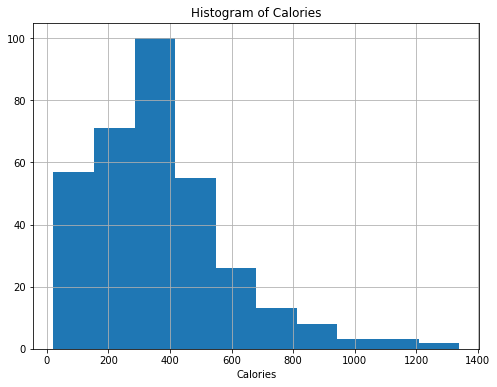

In [51]:
plt.figure(figsize=(8,6))
plt.title('Histogram of Calories')
plt.xlabel('Calories')
plt.grid()
plt.hist(rundata['Calories'])
plt.show()

# Summaries

## Fastest runs

In [54]:
def print_best_perf(data: pd.DataFrame,distance: float, n=int):
    """
    Function that prints best performances based on distance and number of runs
    @data: dataset
    @param distance: Distance of the run
    @param n: number of top performances
    """
    print('Fastest {}k runs: '.format(distance))
    print()
    print(data[(data['Distance']<=distance+0.01) & (data['Distance']>=distance-0.01)].sort_values(by=['Avg_pace_secs']).head(n)[['Date','Distance','Time','Avg Pace']])
    print()


In [55]:
print_best_perf(rundata,6.44,3)

Fastest 6.44k runs: 

                   Date  Distance      Time Avg Pace
303 2022-03-24 19:00:49      6.44  00:41:14     6:24
183 2021-08-23 17:08:37      6.44  00:41:22     6:26
269 2022-01-20 18:35:48      6.44  00:42:07     6:33



In [56]:
main_distances = [3.22,4.83,5,6.44,8.05,10]

In [57]:
for i in main_distances:
    print_best_perf(rundata,i,3)

Fastest 3.22k runs: 

                   Date  Distance      Time Avg Pace
226 2021-11-04 19:22:22      3.22  00:19:43     6:08
243 2021-12-02 18:09:48      3.22  00:20:15     6:18
235 2021-11-18 18:15:35      3.22  00:20:24     6:20

Fastest 4.83k runs: 

                   Date  Distance      Time Avg Pace
255 2021-12-23 17:57:55      4.83  00:28:41     5:57
297 2022-03-14 18:37:06      4.83  00:29:57     6:12
261 2022-01-03 16:32:55      4.83  00:30:11     6:15

Fastest 5k runs: 

                   Date  Distance      Time Avg Pace
299 2022-03-17 18:24:05      5.01  00:30:50     6:09
325 2022-05-18 17:53:26      5.01  00:32:01     6:24
121 2021-04-21 18:50:58      5.00  00:32:31     6:30

Fastest 6.44k runs: 

                   Date  Distance      Time Avg Pace
303 2022-03-24 19:00:49      6.44  00:41:14     6:24
183 2021-08-23 17:08:37      6.44  00:41:22     6:26
269 2022-01-20 18:35:48      6.44  00:42:07     6:33

Fastest 8.05k runs: 

                   Date  Distance      Ti

## Totals and averages

In [67]:
print('Total calories burnt: ' + str(rundata['Calories'].sum()))
print('Total distance run: ' + str(round(rundata['Distance'].sum(),1)))
print('Average pace: ' + str(round(rundata['Avg_pace_secs'].mean(),2)))
print('Average heart rate: ' + str(round(rundata['Avg HR'].mean(),2)))
print('Longest distance run: ' + str(rundata['Distance'].max()))

Total calories burnt: 123031
Total distance run: 1613.3
Average pace: 417.03
Average heart rate: 156.37
Longest distance run: 17.85
